In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree

In [2]:
df_fuel = pd.read_csv("Fuel-Consumption-1-jan-to-15-jan.csv", index_col=0)
df_fuel.head(50)

,SHIFT ID,OPERATOR NAME,DUMPER NO,EMPTY TIME \n(minutes),EMPTY STOP\nTIME\n(minutes),QUEUE AT LU\n(minutes),WAIT AT LU\n(minutes),SPOTTING TIME\n(minutes),LOADING TIME\n(minutes),HAULING TIME\n(minutes),HAULING STOP TIME\n(minutes),WAITING TIME @DUMP\n(minutes),DUMP TIME\n(minutes),LOAD TONS,TOTAL LEAD DISTANCE\n(KM),TOTAL CYCLE TIME\n(minutes),fuel_consumed\n
Date,,,,,,,,,,,,,,,,,
02-02-2023,2,Wenco Support _,RD202,9.23,0.02,0.00,0.00,0.00,4.15,10.32,0.02,0.90,0.52,94.85,3.918,25.16,14.0886
04-02-2023,2,PURUSHOTTAM KR. SINGH,RD2KC2,11.52,1.58,0.00,0.00,0.00,2.70,9.85,0.02,0.78,0.07,48.81,0.000,26.52,33.4311
01-02-2023,1,MANOJ KUMAR,RD206,22.12,16.35,0.00,0.00,0.00,4.55,3.75,0.00,0.00,0.00,94.85,6.650,46.77,66.7825
01-02-2023,3,ANAND KR SINGH,RDO04,8.48,0.25,0.00,0.00,0.00,0.92,0.53,0.02,1.00,0.50,24.66,3.254,11.70,53.8856
01-02-2023,3,UJJAWAL KUMAR SINGH,RD203,12.52,9.68,0.10,0.00,0.00,5.58,12.15,1.88,1.00,0.50,94.85,6.120,43.41,150.3603
01-02-2023,1,RAM SINGH,RD208,7.25,3.50,0.00,0.00,0.00,3.72,4.33,0.02,0.68,0.18,54.20,5.859,19.68,31.6181
01-02-2023,1,SUNIL RAWAT,RD2KC4,3.88,13.92,0.00,0.00,0.00,2.70,3.55,0.02,0.45,0.05,41.37,2.248,24.57,16.2687
01-02-2023,1,SAHDEO SAHU,RD209,16.98,11.43,0.00,0.00,0.00,3.02,5.60,0.02,0.28,0.22,56.50,4.207,37.55,12.5289
01-02-2023,1,--N.D--,RD225,15.08,8.10,0.00,0.00,0.00,3.47,6.07,0.02,0.42,0.20,55.30,8.389,33.36,7.6084


In [3]:
df_fuel.shape

(6048, 17)

In [4]:
df_fuel.columns

Index(['SHIFT ID', 'OPERATOR NAME', 'DUMPER NO', 'EMPTY TIME \n(minutes)',
       'EMPTY STOP\nTIME\n(minutes)', 'QUEUE AT LU\n(minutes)',
       'WAIT AT LU\n(minutes)', 'SPOTTING TIME\n(minutes)',
       'LOADING TIME\n(minutes)', 'HAULING    TIME\n(minutes)',
       'HAULING STOP TIME\n(minutes)', 'WAITING TIME @DUMP\n(minutes)',
       'DUMP TIME\n(minutes)', 'LOAD TONS', 'TOTAL LEAD DISTANCE\n(KM)',
       'TOTAL CYCLE TIME\n(minutes)', 'fuel_consumed\n'],
      dtype='object')

In [5]:
df_fuel = df_fuel.drop(columns='OPERATOR NAME')

In [6]:
df_fuel = df_fuel.drop(columns='DUMPER NO')

In [7]:
df_fuel = df_fuel.drop(columns='SHIFT ID')

In [8]:
df_fuel = df_fuel.drop(columns='TOTAL CYCLE TIME\n(minutes)')

df_fuel = df_fuel.drop(columns='LOAD TONS')

df_fuel = df_fuel.drop(columns='TOTAL LEAD DISTANCE\n(KM)')

In [9]:
df_fuel.columns

Index(['EMPTY TIME \n(minutes)', 'EMPTY STOP\nTIME\n(minutes)',
       'QUEUE AT LU\n(minutes)', 'WAIT AT LU\n(minutes)',
       'SPOTTING TIME\n(minutes)', 'LOADING TIME\n(minutes)',
       'HAULING    TIME\n(minutes)', 'HAULING STOP TIME\n(minutes)',
       'WAITING TIME @DUMP\n(minutes)', 'DUMP TIME\n(minutes)', 'LOAD TONS',
       'TOTAL LEAD DISTANCE\n(KM)', 'fuel_consumed\n'],
      dtype='object')

In [10]:
x = df_fuel.drop('fuel_consumed\n', axis = 1) # Features
y = df_fuel['fuel_consumed\n']  # Target
X_train,X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.01, random_state = 28)

In [11]:
lr = svm.SVR(kernel="linear", C=100, gamma="auto")
lr.fit(X_train, Y_train)


SVR(C=100, gamma='auto', kernel='linear')

In [12]:
print('weights: ')
print(lr.coef_)
print('Intercept: ')
print(lr.intercept_)

weights: 
[[ 1.76733092e-01  1.16160868e-01  3.02388996e-02  1.37604824e+00
   2.19633000e-01 -1.79060635e-01  7.71477373e-01  4.03180712e-04
  -2.08430870e+00  2.16371948e-01  4.60958790e-02  3.51301444e+00]]
Intercept: 
[-5.3272741]


In [13]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.5284016770258438


In [14]:
def get_mape(y_true, y_pred):
 y_true, y_pred = np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
Y_train_pred = lr.predict(X_train)
# Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [16]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))
print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  0.53
Training Explained Variation:  0.53
Training MAPE: inf
Training Mean Squared Error: 276.8
Training RMSE:  16.64
Training MAE:  8.11
 
Test R-squared:  0.76
Test Explained Variation:  0.77
Test MAPE: inf
Test Mean Squared Error: 136.55
Test RMSE:  11.69
Test MAE:  7.62


C:\Users\priya\AppData\Local\Temp\ipykernel_24964\1989195731.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\priya\AppData\Local\Temp\ipykernel_24964\1989195731.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [17]:
df_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
df_pred['Predicted'] = Y_test_pred
df_pred = df_pred.reset_index()
df_pred


,Date\n,Actual,Predicted
0,03-02-2023,16.5836,13.929363
1,08-02-2023,21.3659,15.558456
2,05-02-2023,23.4416,29.038879
3,01-02-2023,0.0000,7.165573
4,06-02-2023,19.5905,12.673168
...,...,...,...
56,04-02-2023,25.8295,23.059601
57,02-02-2023,13.2454,19.108174
58,09-02-2023,8.0184,11.883846
59,01-02-2023,6.5633,-1.393902


<AxesSubplot: >

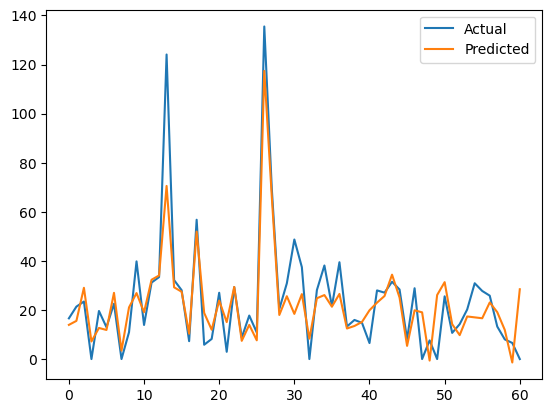

In [18]:
df_pred[['Actual', 'Predicted']].plot()


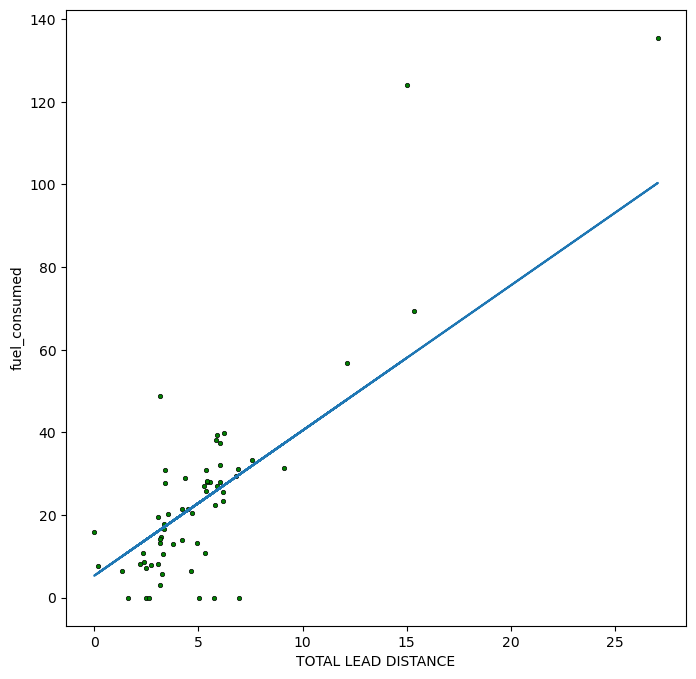

In [43]:
x_val = X_test['TOTAL LEAD DISTANCE\n(KM)'].values
y = lr.coef_[0][11]*x_val - lr.intercept_
plt.figure(figsize=(8,8))
plt.plot(x_val,y)
plt.scatter(x_val,Y_test,edgecolors='black',c='green',linewidths=0.5,s=10)
plt.ylabel("fuel_consumed")
plt.xlabel("TOTAL LEAD DISTANCE")
plt.show()

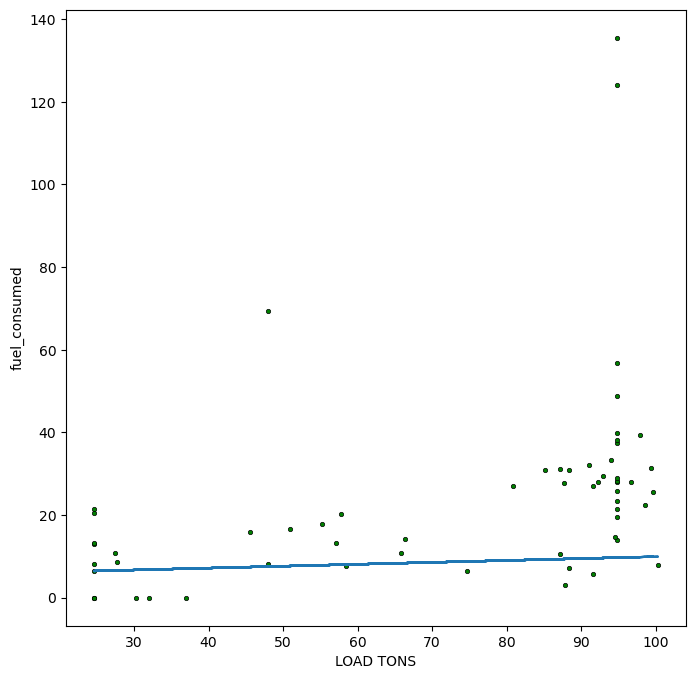

In [42]:
x_val = X_test['LOAD TONS'].values
y = lr.coef_[0][10]*x_val - lr.intercept_
plt.figure(figsize=(8,8))
plt.plot(x_val,y)
plt.scatter(x_val,Y_test,edgecolors='black',c='green',linewidths=0.5,s=10)
plt.ylabel("fuel_consumed")
plt.xlabel("LOAD TONS")
plt.show()

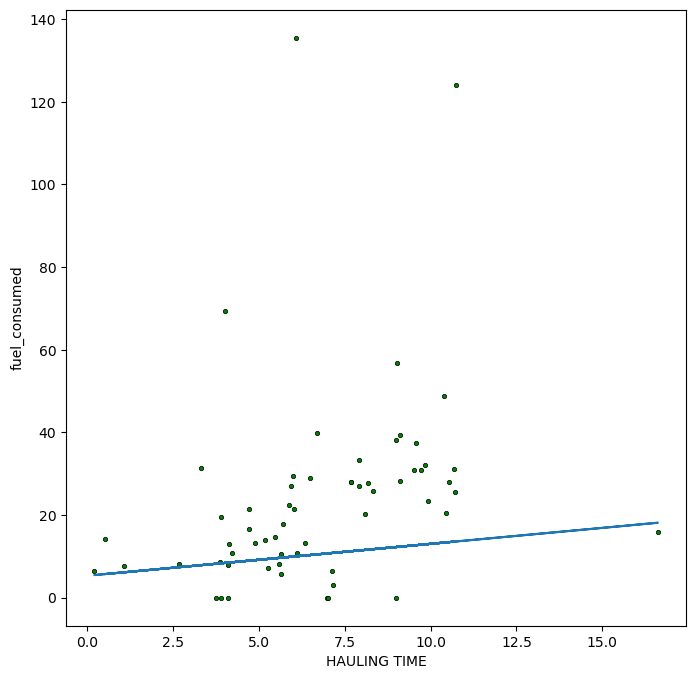

In [41]:
x_val = X_test['HAULING    TIME\n(minutes)'].values
y = lr.coef_[0][6]*x_val - lr.intercept_
plt.figure(figsize=(8,8))
plt.plot(x_val,y)
plt.scatter(x_val,Y_test,edgecolors='black',c='green',linewidths=0.5,s=10)
plt.ylabel("fuel_consumed")
plt.xlabel("HAULING TIME")
plt.show()

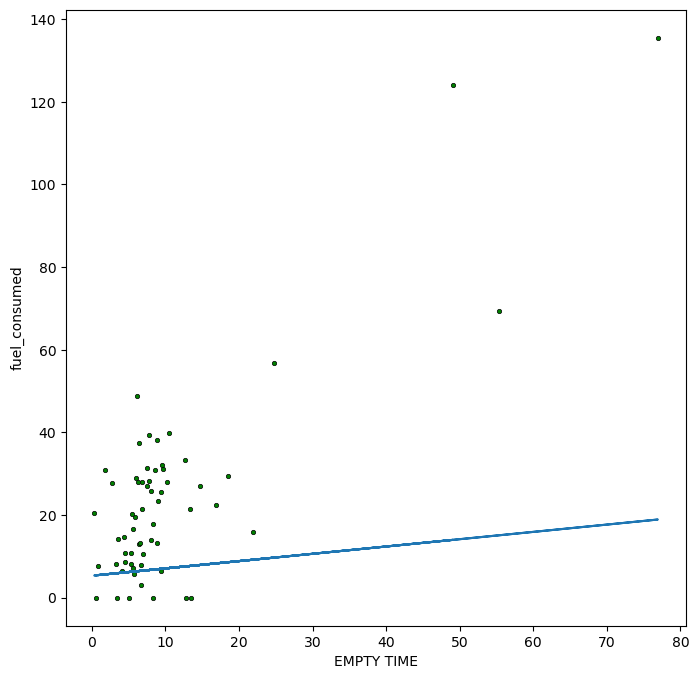

In [40]:
x_val = X_test['EMPTY TIME \n(minutes)'].values
y = lr.coef_[0][0]*x_val - lr.intercept_
plt.figure(figsize=(8,8))
plt.plot(x_val,y)
plt.scatter(x_val,Y_test,edgecolors='black',c='green',linewidths=0.5,s=10)
plt.ylabel("fuel_consumed")
plt.xlabel("EMPTY TIME")
plt.show()

In [22]:
df_fuel.corr()

,EMPTY TIME \n(minutes),EMPTY STOP\nTIME\n(minutes),QUEUE AT LU\n(minutes),WAIT AT LU\n(minutes),SPOTTING TIME\n(minutes),LOADING TIME\n(minutes),HAULING TIME\n(minutes),HAULING STOP TIME\n(minutes),WAITING TIME @DUMP\n(minutes),DUMP TIME\n(minutes),LOAD TONS,TOTAL LEAD DISTANCE\n(KM),fuel_consumed\n
EMPTY TIME \n(minutes),1.000000,0.420252,0.080198,-0.006635,-0.036183,0.041239,0.053910,0.014573,-0.034795,-0.022471,0.072170,0.549345,0.469359
EMPTY STOP\nTIME\n(minutes),0.420252,1.000000,0.071902,-0.010647,-0.036448,0.040469,0.009909,0.020075,-0.038184,0.008341,0.079138,0.334794,0.335367
QUEUE AT LU\n(minutes),0.080198,0.071902,1.000000,-0.003709,0.017053,-0.004967,-0.030176,0.004385,0.023806,0.023077,-0.050518,0.082626,0.043332
WAIT AT LU\n(minutes),-0.006635,-0.010647,-0.003709,1.000000,0.004961,-0.019969,0.004326,-0.004299,-0.025346,-0.014409,-0.015711,-0.020526,0.091155
SPOTTING TIME\n(minutes),-0.036183,-0.036448,0.017053,0.004961,1.000000,0.035203,0.003801,0.003587,-0.034045,-0.005204,0.051723,-0.020949,-0.018502
LOADING TIME\n(minutes),0.041239,0.040469,-0.004967,-0.019969,0.035203,1.000000,0.099053,0.061718,-0.024615,0.116471,0.273136,0.060384,0.083681
HAULING TIME\n(minutes),0.053910,0.009909,-0.030176,0.004326,0.003801,0.099053,1.000000,0.124894,0.012399,0.022656,0.202314,0.176552,0.230363
HAULING STOP TIME\n(minutes),0.014573,0.020075,0.004385,-0.004299,0.003587,0.061718,0.124894,1.000000,-0.037400,0.026721,0.011540,0.054666,0.061711
WAITING TIME @DUMP\n(minutes),-0.034795,-0.038184,0.023806,-0.025346,-0.034045,-0.024615,0.012399,-0.037400,1.000000,0.485003,-0.152628,0.008895,-0.030689
DUMP TIME\n(minutes),-0.022471,0.008341,0.023077,-0.014409,-0.005204,0.116471,0.022656,0.026721,0.485003,1.000000,0.039502,0.038530,0.041385


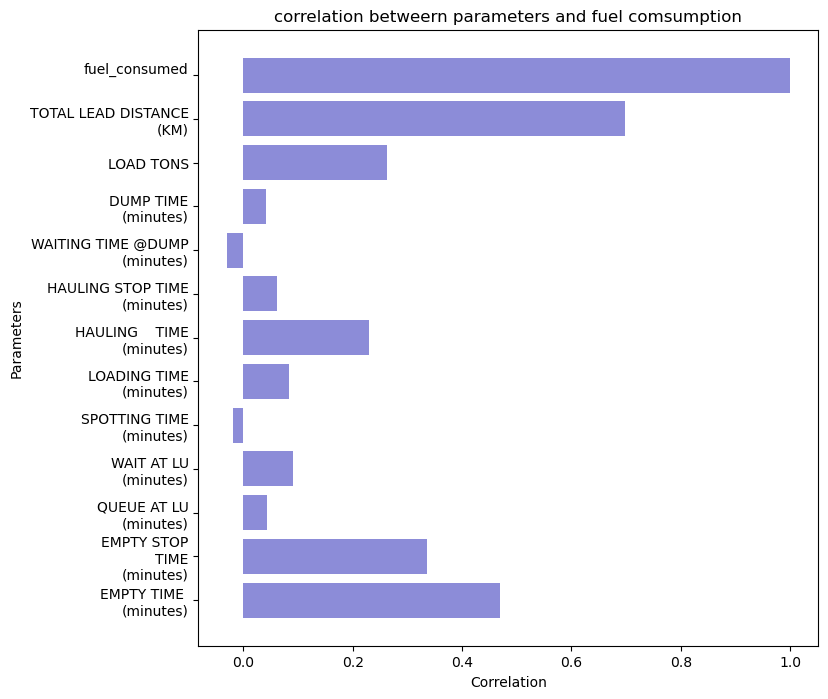

In [23]:
data = df_fuel.corr()
courses = data.columns
values = data['fuel_consumed\n']
  
fig = plt.figure(figsize = (8, 8))
 
# creating the bar plot
bars = plt.barh(courses, values, color=(0.1, 0.1, 0.7, 0.5))

plt.xlabel("Correlation")
plt.ylabel("Parameters")
plt.title("correlation betweern parameters and fuel comsumption")
plt.show()

In [24]:
sample=X_test.copy(deep=True)
sample

,EMPTY TIME \n(minutes),EMPTY STOP\nTIME\n(minutes),QUEUE AT LU\n(minutes),WAIT AT LU\n(minutes),SPOTTING TIME\n(minutes),LOADING TIME\n(minutes),HAULING TIME\n(minutes),HAULING STOP TIME\n(minutes),WAITING TIME @DUMP\n(minutes),DUMP TIME\n(minutes),LOAD TONS,TOTAL LEAD DISTANCE\n(KM)
Date,,,,,,,,,,,,
03-02-2023,5.55,17.20,0.00,0.0,0.00,3.05,4.72,0.02,0.48,0.25,50.90,3.354
08-02-2023,6.88,2.52,0.00,0.0,0.00,4.52,6.02,0.02,0.20,0.28,24.66,4.202
05-02-2023,9.03,3.92,5.08,0.0,2.55,4.05,9.92,0.02,0.72,0.52,94.85,6.174
01-02-2023,3.48,0.00,7.88,0.0,0.00,2.52,3.90,0.02,0.50,0.20,30.30,2.472
06-02-2023,5.85,6.08,0.00,0.0,0.40,5.22,3.88,0.02,0.55,0.33,94.85,3.079
...,...,...,...,...,...,...,...,...,...,...,...,...
04-02-2023,8.02,0.00,0.77,0.0,0.00,3.90,8.32,0.02,1.00,0.50,94.85,5.360
02-02-2023,8.80,18.10,0.00,0.0,0.00,2.87,6.33,0.02,1.00,0.38,24.66,4.917
09-02-2023,6.70,0.40,0.00,0.0,0.00,4.47,4.10,0.03,0.30,0.20,100.30,2.726


In [25]:
def find_perc_change(a,b):
    temp=0
    for i in range(len(a)):
        temp+=abs(a[i]-b[i])/b[i]
    temp/=len(a)
    return abs(temp*100)

In [26]:
def change_parameter(change):
    result={}
    sample=X_test.copy(deep=True)
    for parameter in X_test.columns:
        sample=X_test.copy(deep=True)
        sample[parameter] = sample[parameter]*change
        sample_pred = lr.predict(sample)
        per = find_perc_change(sample_pred,Y_test_pred)
        result[parameter]=[per]
    return result

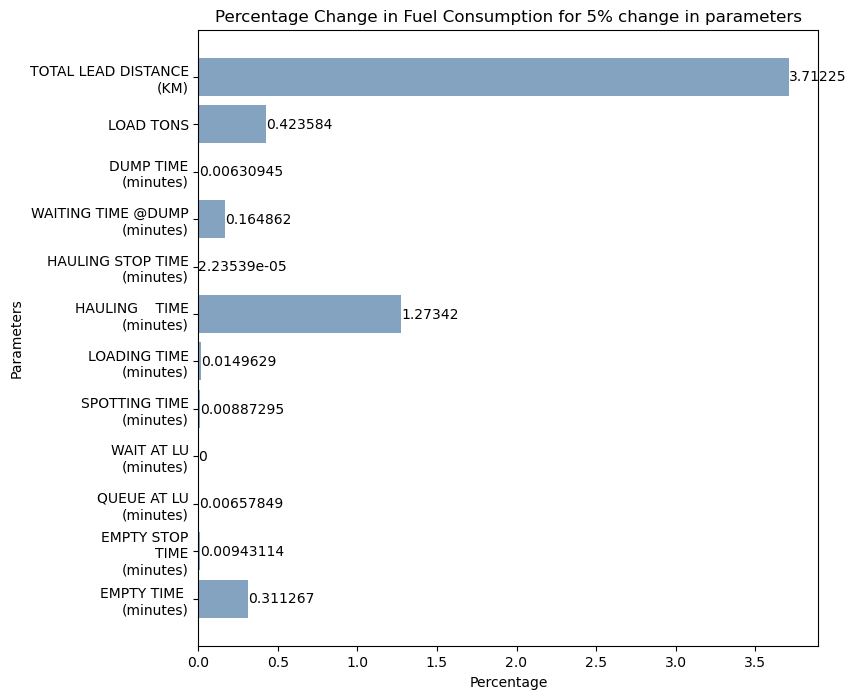

In [27]:
data = pd.DataFrame(change_parameter(0.95))

fig = plt.figure(figsize = (8, 8))

courses = data.columns
values = data.values[0]

bars = plt.barh(courses, values, color=(0.2, 0.4, 0.6, 0.6))

plt.bar_label(bars)
 
plt.xlabel("Percentage")
plt.ylabel("Parameters")
plt.title("Percentage Change in Fuel Consumption for 5% change in parameters")
plt.show()


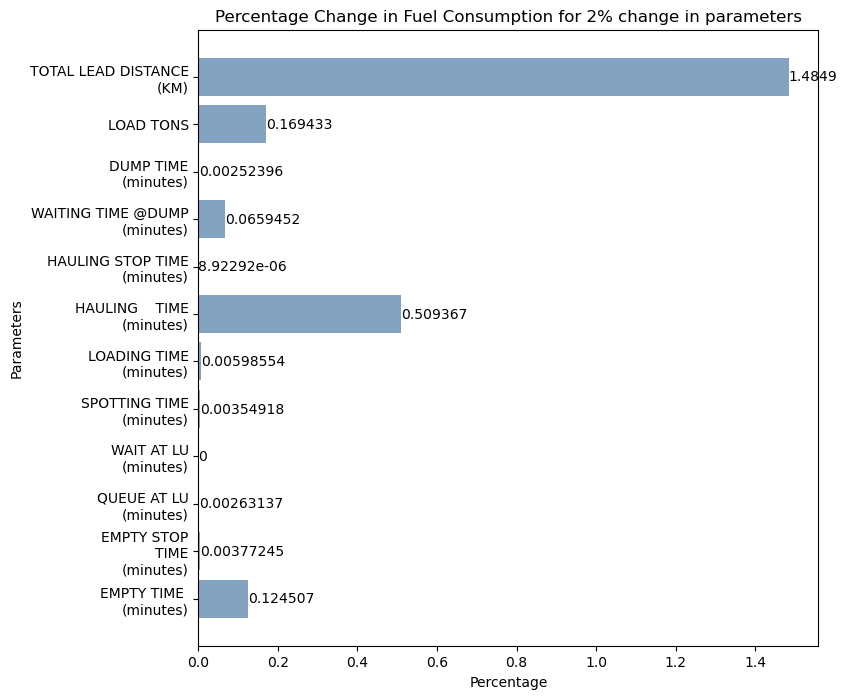

In [28]:
data = pd.DataFrame(change_parameter(0.98))

fig = plt.figure(figsize = (8, 8))

courses = data.columns
values = data.values[0]

bars = plt.barh(courses, values, color=(0.2, 0.4, 0.6, 0.6))

plt.bar_label(bars)
plt.xlabel("Percentage")
plt.ylabel("Parameters")
plt.title("Percentage Change in Fuel Consumption for 2% change in parameters")
plt.show()
